<a href="https://colab.research.google.com/github/tesyaeriana/Machine_Learning/blob/main/pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Langkah 1 - Mengimport Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/dataset.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/ML')

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

**Langkah 2 - Pra Pengolahan**



> Langkah 2.1. Pra Pengolahan Data Training



In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.




> Langkah 2.2. Pra Pengolahan Data Testing



In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


**Langkah 3 - Pembuatan Model CNN**





> Langkah 3.1.  - Inisiasi Model CNN



In [ ]:
cnn = tf.keras.models.Sequential()



> Langkah 3.2. - Pembuatan Layer Konvolusi 1



In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))



> Langkah 3.3 - Pembuatan Layer Pooling 1



In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



> Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2



In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



> Langkah 3.5 - Flattening



In [ ]:
cnn.add(tf.keras.layers.Flatten())



> Langkah 3.6 - Fully Connected Layer 1 (Input)



In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))



> Langkah 3.7 - Fully Connected Layer 2 (Output)



In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



> Langkah 3.8 - Compile Model CNN



In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 4 - Fit CNN**

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 51s 155ms/step - loss: 0.6709 - accuracy: 0.5900 - val_loss: 0.6211 - val_accuracy: 0.6510
Epoch 2/25
250/250 [==============================] - 38s 151ms/step - loss: 0.6059 - accuracy: 0.6749 - val_loss: 0.6050 - val_accuracy: 0.6705
Epoch 3/25
250/250 [==============================] - 38s 151ms/step - loss: 0.5693 - accuracy: 0.7039 - val_loss: 0.5322 - val_accuracy: 0.7220
Epoch 4/25
250/250 [==============================] - 39s 155ms/step - loss: 0.5371 - accuracy: 0.7305 - val_loss: 0.5428 - val_accuracy: 0.7295
Epoch 5/25
250/250 [==============================] - 38s 153ms/step - loss: 0.5100 - accuracy: 0.7461 - val_loss: 0.5147 - val_accuracy: 0.7380
Epoch 6/25
250/250 [==============================] - 44s 178ms/step - loss: 0.5049 - accuracy: 0.7517 - val_loss: 0.5411 - val_accuracy: 0.7330
Epoch 7/25
250/250 [==============================] - 38s 153ms/step - loss: 0.4851 - accuracy: 0.7640 - val_loss: 0.4768 - val_ac

**Langkah 5 - Prediksi dengan 1 Citra**

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 203ms/step


**PRAKTIKUM 2**

**Langkah 1 - Load Library**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Langkah 2 - Unduh Dataset CIFAR**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


**Langkah 3 - Verifikasi Data**

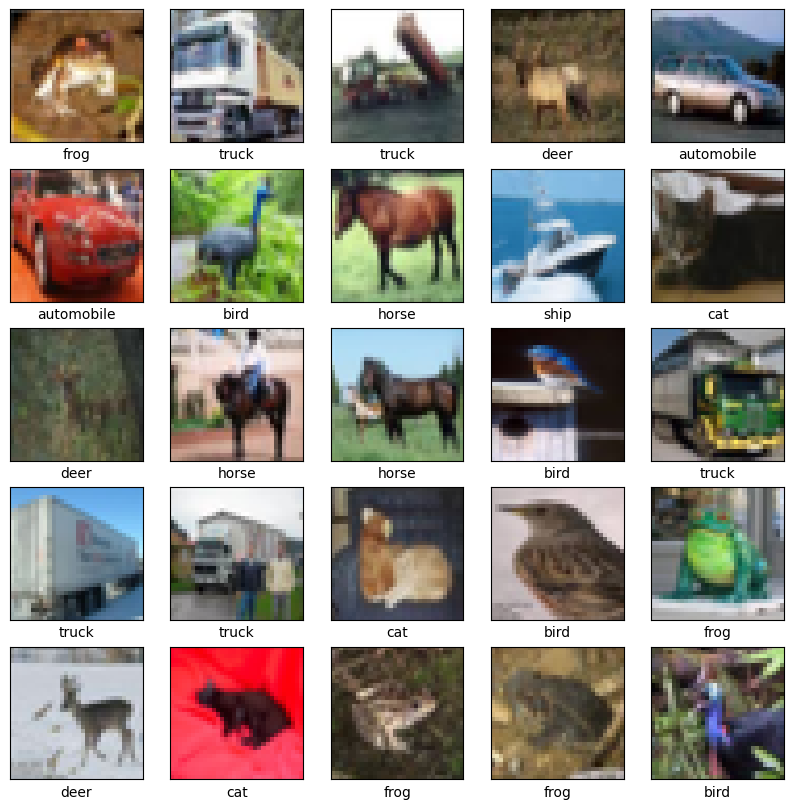

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Langkah 4 - Buat Model CNN**



> Langkah 4.1 - Buat Layer Konvolusi



In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



> Langkah 4.2. - Cek Arsitektur Konvolusi



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632



> Langkah 4.3. - Tambahkan Layer Fully Connected



In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



> Langkah 4.4. - Cek Arsitektur Model CNN



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             



> Langkah 4.5. - Compile Model CNN



In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


**Langkah 5 - Fit Model**



In [ ]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5240 - accuracy: 0.4439 - val_loss: 1.2843 - val_accuracy: 0.5308
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1554 - accuracy: 0.5900 - val_loss: 1.0921 - val_accuracy: 0.6130
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0224 - accuracy: 0.6398 - val_loss: 1.0296 - val_accuracy: 0.6364
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9256 - accuracy: 0.6749 - val_loss: 1.0091 - val_accuracy: 0.6471
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8589 - accuracy: 0.6966 - val_loss: 0.9142 - val_accuracy: 0.6852
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7997 - accuracy: 0.7179 - val_loss: 0.9308 - val_accuracy: 0.6786
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7537 - accuracy: 0.7347 - val_loss: 0.9137 - val_accurac




**Evaluasi Model**


313/313 - 1s - loss: 0.8612 - accuracy: 0.7113 - 783ms/epoch - 3ms/step


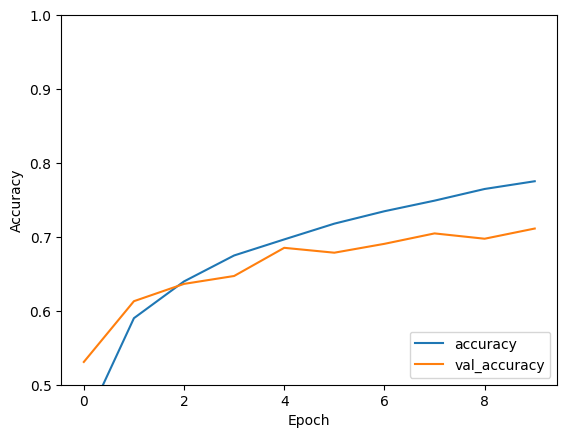

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7113000154495239


**TUGAS**

**Tugas 1 : Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%**

**Mengimport Library yang akan digunakan**

In [25]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

**Mengunduh Dataset Cifar10**

In [26]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


**Memverifikasi Data**

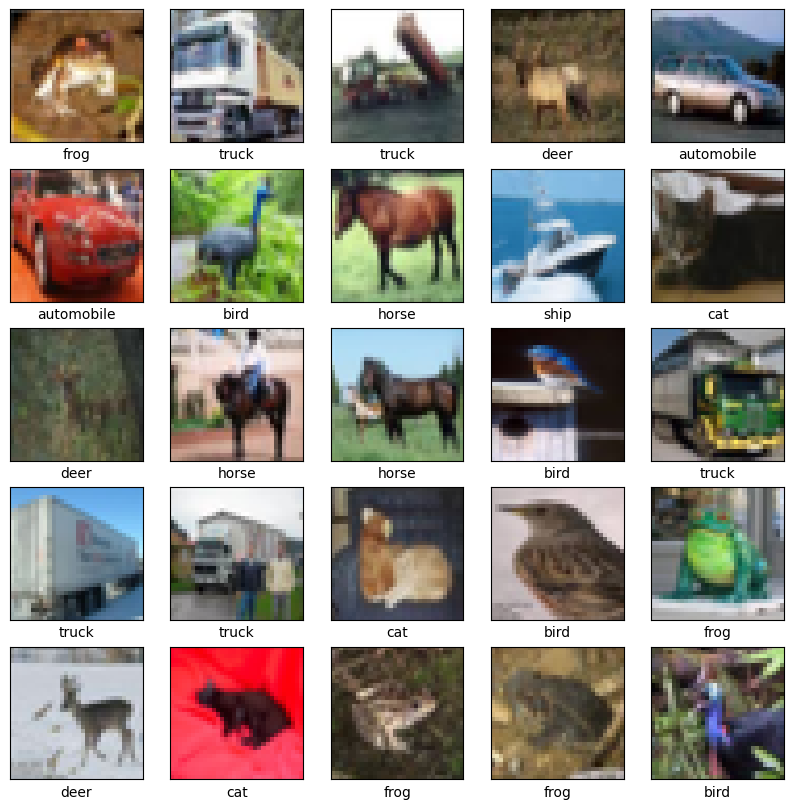

In [27]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

plt.show()


**Normalisasi data train dan data test**

In [28]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

**One Hot Encode label**

In [29]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

**Membagi train set untuk Validation Set**

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

**Membuat CNN Model**

In [31]:
def cnn_model():

    model = Sequential()

    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

**Augmentasi Data**

In [32]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(X_train)

**Inisialisasi Model**

In [33]:
model = cnn_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 256)        

**Compile Model**

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
# Assuming you have already defined your model and assigned it to the variable 'model'
# Define the initial learning rate, decay steps, and decay rate
initial_learning_rate = 0.0003
decay_steps = 10000
decay_rate = 0.9
# Create a learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)
# Instantiate the Adam optimizer with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


**Fit Model**

In [35]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64),
                    steps_per_epoch = len(X_train) // 64,
                    epochs = 125,
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/125


<ipython-input-35-72f3a81ecd28>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64),


625/625 [==============================] - 35s 53ms/step - loss: 2.1444 - accuracy: 0.1978 - val_loss: 1.7739 - val_accuracy: 0.3412
Epoch 2/125
625/625 [==============================] - 33s 53ms/step - loss: 1.7437 - accuracy: 0.3494 - val_loss: 1.4573 - val_accuracy: 0.4662
Epoch 3/125
625/625 [==============================] - 37s 59ms/step - loss: 1.5331 - accuracy: 0.4528 - val_loss: 1.2512 - val_accuracy: 0.5520
Epoch 4/125
625/625 [==============================] - 33s 53ms/step - loss: 1.4108 - accuracy: 0.5075 - val_loss: 1.2305 - val_accuracy: 0.5681
Epoch 5/125
625/625 [==============================] - 33s 54ms/step - loss: 1.3197 - accuracy: 0.5476 - val_loss: 1.0746 - val_accuracy: 0.6216
Epoch 6/125
625/625 [==============================] - 33s 53ms/step - loss: 1.2422 - accuracy: 0.5827 - val_loss: 1.0969 - val_accuracy: 0.6237
Epoch 7/125
625/625 [==============================] - 33s 52ms/step - loss: 1.1813 - accuracy: 0.6078 - val_loss: 0.9398 - val_accuracy: 0.68

**Plotting Train dan Validaion Accuracy**

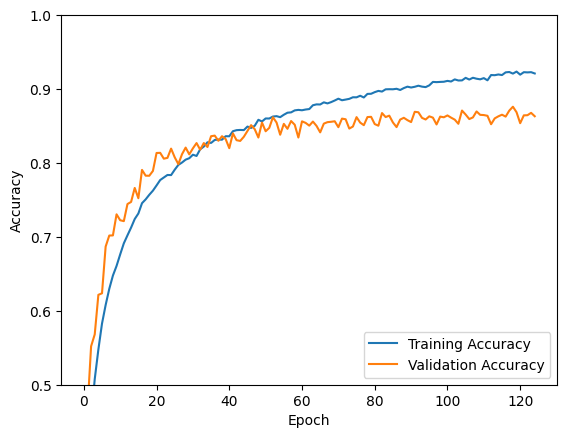

313/313 - 2s - loss: 0.6869 - accuracy: 0.8591 - 2s/epoch - 5ms/step
Test Accuracy: 0.8590999841690063


In [36]:
import matplotlib.pyplot as plt
import numpy as np  # Add this line to import numpy

# Assuming you have trained your model and stored the history in the variable 'history'

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc}')


**Tugas 2 Klasifikasi Data MNIST menggunakan CNN**



> Mengimport library yang akan digunakan



In [5]:
# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist

# from keras.optimizers import RMSprop
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau

**Menyiapkan data**

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255



11490434/11490434 [==============================] - 0s 0us/step


In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Model Parameter**

In [8]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

**Membuat Model CNN**

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

**Compile Model**

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model Summary**

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

**Model Fitting**

In [14]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_data=(X_val, y_val))


Epoch 1/10
329/329 - 13s - loss: 0.3733 - accuracy: 0.8833 - val_loss: 0.0919 - val_accuracy: 0.9724 - 13s/epoch - 40ms/step
Epoch 2/10
329/329 - 2s - loss: 0.1076 - accuracy: 0.9674 - val_loss: 0.0696 - val_accuracy: 0.9796 - 2s/epoch - 6ms/step
Epoch 3/10
329/329 - 2s - loss: 0.0747 - accuracy: 0.9774 - val_loss: 0.0518 - val_accuracy: 0.9846 - 2s/epoch - 5ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0569 - accuracy: 0.9830 - val_loss: 0.0488 - val_accuracy: 0.9850 - 2s/epoch - 7ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0447 - val_accuracy: 0.9879 - 2s/epoch - 7ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0396 - accuracy: 0.9880 - val_loss: 0.0449 - val_accuracy: 0.9867 - 2s/epoch - 5ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0444 - val_accuracy: 0.9873 - 2s/epoch - 5ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0440 - val_accuracy: 0.9884 - 2s/epoch - 6ms/step
Epoch 9/10
329/329 - 

**Membuat Plot Accuracy dan Loss**

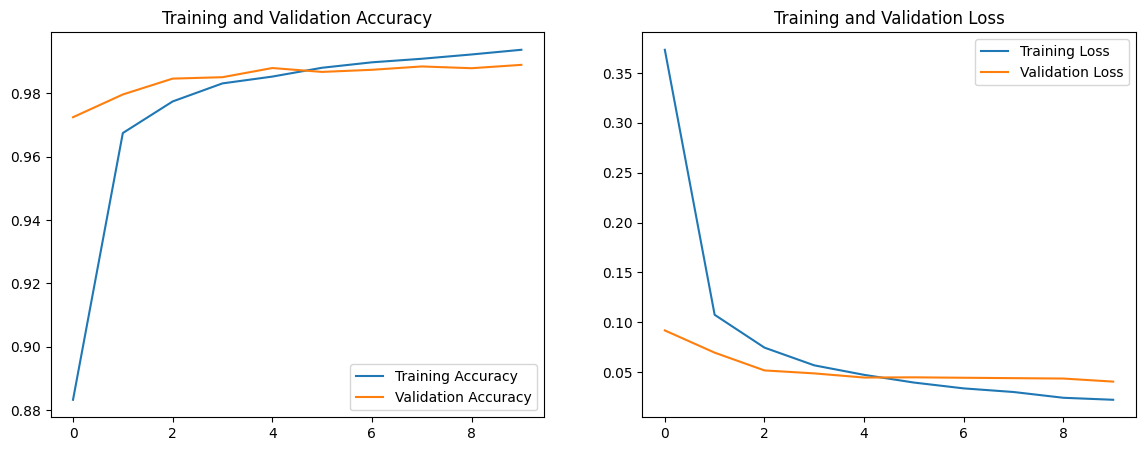

In [15]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

**Evaluasi Validasi Dataset**

In [17]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val, verbose=False)

[0.040574803948402405, 0.9888888597488403]

In [19]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

563/563 [==============================] - 2s 3ms/step
[1.0280192e-11 3.6623951e-10 3.2104831e-12 8.3281590e-11 1.2688829e-10
 2.3246609e-12 5.1422036e-15 1.0000000e+00 3.3775490e-14 7.0607209e-09]
7


In [20]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1805
           1       0.99      1.00      0.99      1994
           2       0.99      0.99      0.99      1759
           3       0.99      0.99      0.99      1846
           4       0.99      0.99      0.99      1726
           5       0.99      0.99      0.99      1653
           6       0.99      1.00      0.99      1787
           7       0.99      0.99      0.99      1937
           8       0.99      0.98      0.99      1730
           9       0.98      0.99      0.98      1763

    accuracy                           0.99     18000
   macro avg       0.99      0.99      0.99     18000
weighted avg       0.99      0.99      0.99     18000



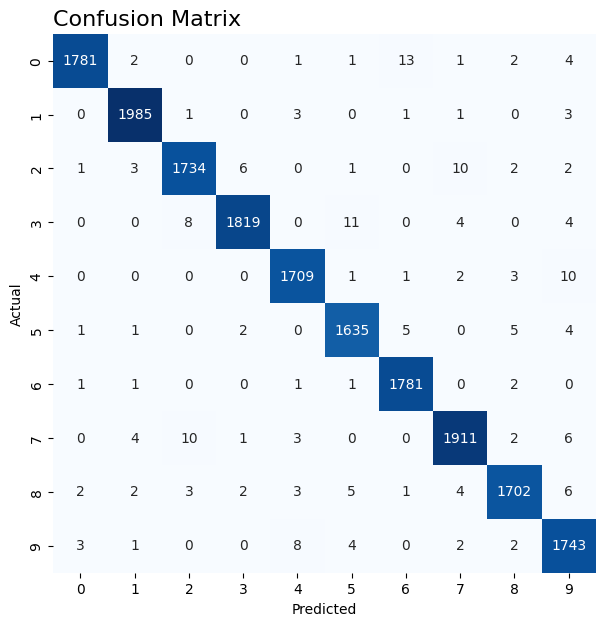

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

**Memprediksi Test**

In [24]:
# Predicted values
y_pred_enc = model.predict(test_images)

# Decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])


313/313 [==============================] - 1s 3ms/step
[4.1519006e-09 1.3645867e-07 3.3338388e-08 1.1209840e-07 4.4898920e-09
 3.1076322e-09 4.6383240e-12 9.9999833e-01 1.3209683e-10 1.4274116e-06]
7


<ipython-input-26-5ba06cebbccd>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


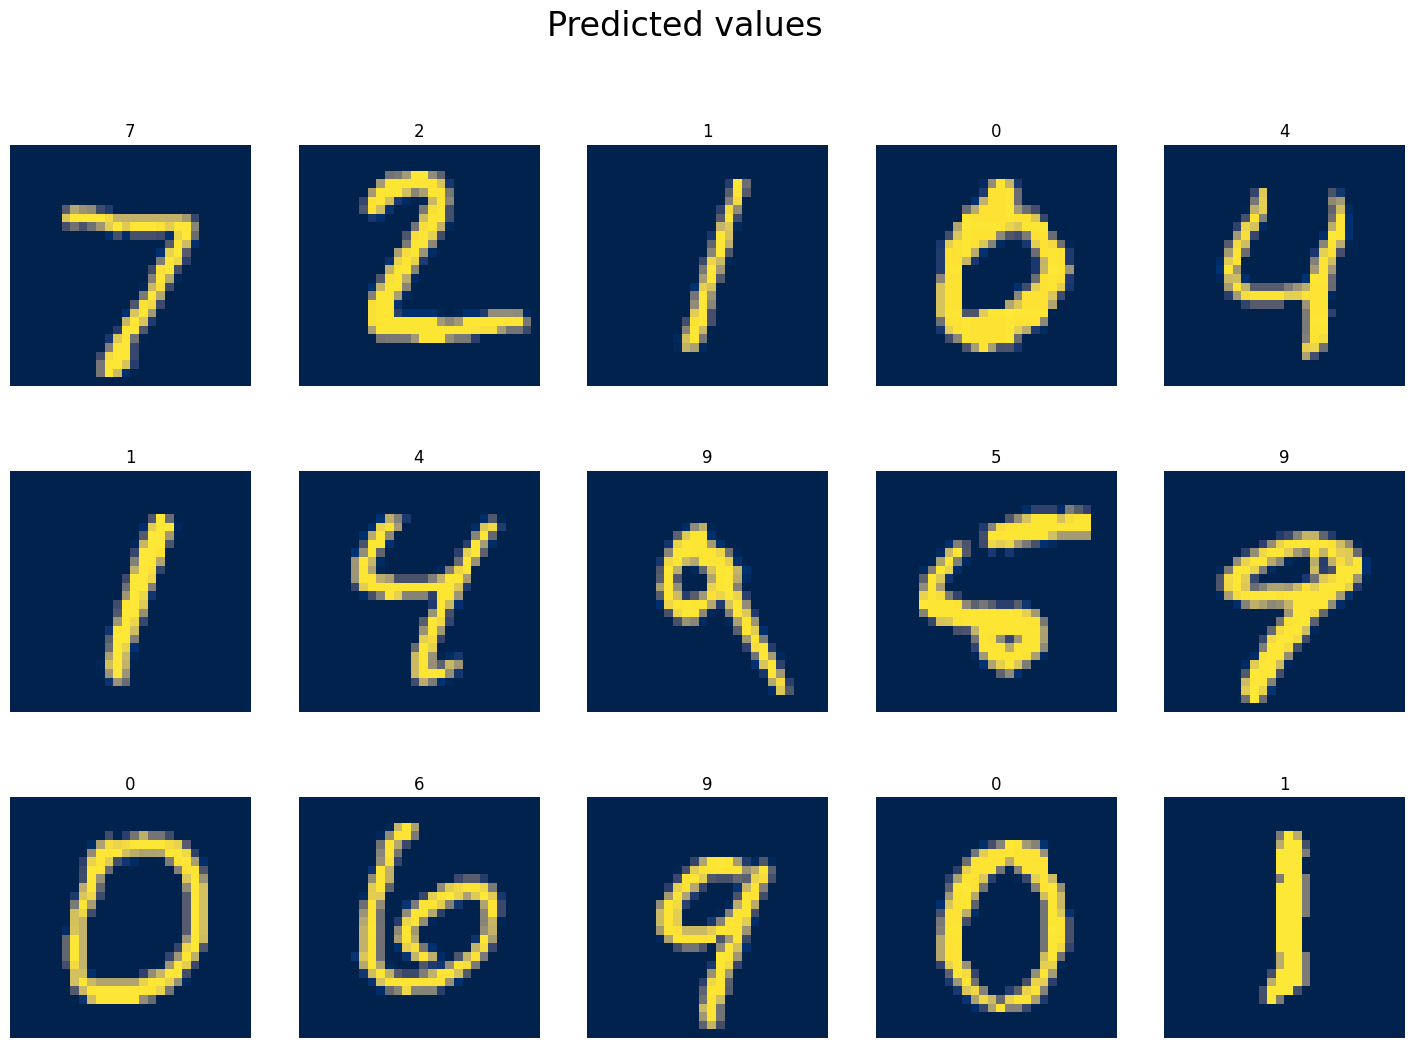

In [26]:
# predicted targets of each images
# (labels above the images are predicted labels)
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')